In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("./data/train.csv", 
                       index_col='PassengerId')
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Quick, Mrs. Frederick Charles (Jane Richards)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [49]:
df = df.drop('Cabin', axis=1).dropna()


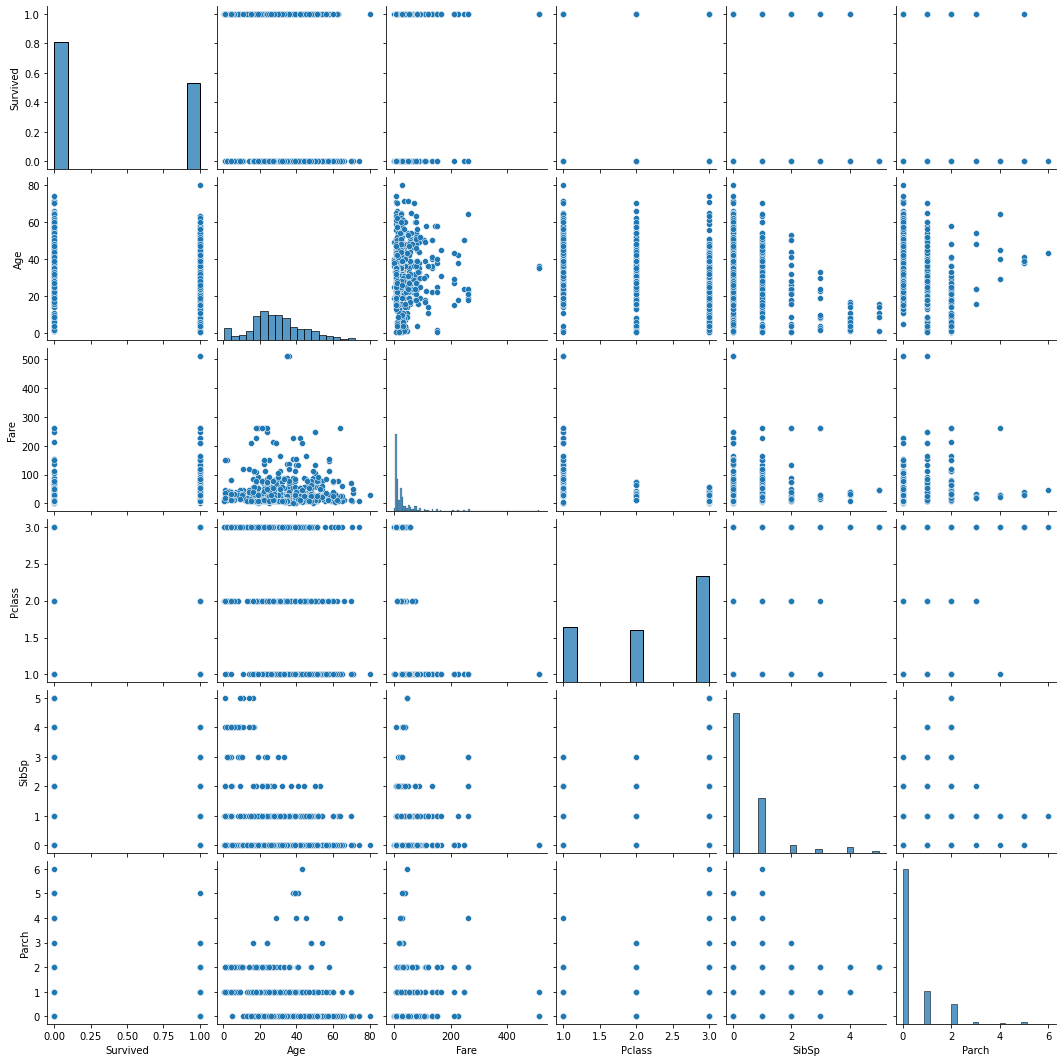

In [51]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 
                       'Pclass', 'Sex', 'SibSp', 
                       'Parch', 'Embarked']]);

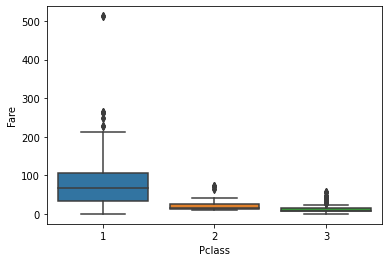

In [53]:
sns.boxplot(x='Pclass', y='Fare', data=df);


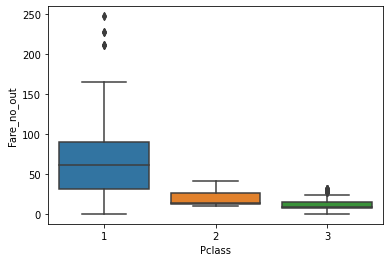

In [133]:
df['Fare_no_out'] = df['Fare']
fare_pclass1 = df[df['Pclass'] == 1]['Fare']
fare_pclass2 = df[df['Pclass'] == 2]['Fare']
fare_pclass3 = df[df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - 
                                    fare_pclass1.mean()).abs()  
                                   < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - 
                                    fare_pclass2.mean()).abs()  
                                   < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - 
                                    fare_pclass3.mean()).abs() 
                                   < 2 * fare_pclass3.std()]
df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot(x='Pclass', y='Fare_no_out', data=df);



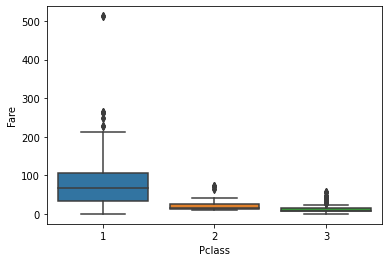

In [132]:
sns.boxplot(x='Pclass', y='Fare', data=df);



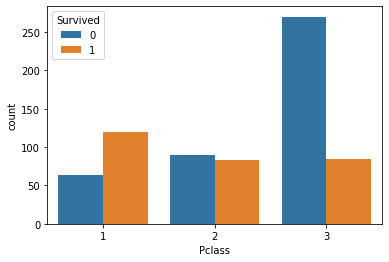

In [138]:
# sns.countplot(x="Sex", hue="Survived", data=df);
sns.countplot(x="Pclass", hue="Survived", data=df);



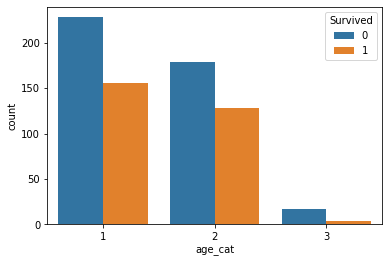

In [142]:
df['age_cat'] = df['Age'].apply(lambda age: 1 if age < 30 
                                            else 3 if age > 60 else 2);

sns.countplot(x='age_cat', hue='Survived', data=df);
